<h2>Tugas Besar Pengantar Bioinformatika<br>Ilmi Kalam<br>H071171503</h2>

<h2>1. Eksplorasi Data</h2>

<p>Dataset yang digunakan adalah Mice Protein Expression Data Set.<br>https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression
</p>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel("E://Ilmi//Kampus//Akademik//Pengantar Bioinformatika//Tugas Besar//Data_Cortex_Nuclear.xls")
independent_var = df.iloc[:,0:-1] 
dependent_var = df.iloc[:,-1]

In [3]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

<h2>2. Preprocessing</h2>

<h3>Mengisi missing value</h3>
<p>Missing value diimputasi dengan metode mean</p>

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(independent_var.iloc[:, 1:78])
independent_var.iloc[:, 1:78] = imputer.transform(independent_var.iloc[:, 1:78])

In [6]:
df = pd.DataFrame(independent_var).join(dependent_var)
df_utuh = pd.DataFrame(independent_var).join(dependent_var).drop(columns=['MouseID'])

In [7]:
df.isnull().sum().sum()

0

<h3>Filtering</h3>

In [8]:
numcols = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
catcols = ['Genotype','Treatment','Behavior']

In [9]:
df1 = df[numcols+catcols] 

In [10]:
traindf = pd.concat([df1[numcols], pd.get_dummies(df1[catcols])],axis=1)
features = traindf.columns

In [11]:
traindf = pd.DataFrame(traindf,columns=features)
X = traindf.copy()

In [12]:
y = traindf['EGR1_N']>=0.131790
X = traindf.copy()
del X['EGR1_N']

In [13]:
feature_name = list(X.columns)
# Jumlah maksimal fitur setelah filtering
num_feats=30

<h3>Chi-Square Features</h3>

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

30 selected features


In [15]:
chi_feature

['DYRK1A_N',
 'ITSN1_N',
 'pCAMKII_N',
 'pELK_N',
 'pERK_N',
 'pPKCAB_N',
 'BRAF_N',
 'ELK_N',
 'ERK_N',
 'GSK3B_N',
 'TRKA_N',
 'APP_N',
 'Bcatenin_N',
 'SOD1_N',
 'P38_N',
 'pP70S6_N',
 'GFAP_N',
 'SNCA_N',
 'Ubiquitin_N',
 'SHH_N',
 'BAD_N',
 'BCL2_N',
 'pCFOS_N',
 'H3AcK18_N',
 'H3MeK4_N',
 'CaNA_N',
 'Genotype_Control',
 'Genotype_Ts65Dn',
 'Behavior_C/S',
 'Behavior_S/C']

In [16]:
df2 = traindf[chi_feature]
df2.tail()

,DYRK1A_N,ITSN1_N,pCAMKII_N,pELK_N,pERK_N,pPKCAB_N,BRAF_N,ELK_N,ERK_N,GSK3B_N,...,BAD_N,BCL2_N,pCFOS_N,H3AcK18_N,H3MeK4_N,CaNA_N,Genotype_Control,Genotype_Ts65Dn,Behavior_C/S,Behavior_S/C
1075,0.254860,0.463591,2.483740,1.057971,0.265642,1.241958,0.255744,0.896430,1.822906,0.993107,...,0.190483,0.134762,0.183324,0.318782,0.328327,1.364823,0,1,0,1
1076,0.272198,0.474163,2.512737,1.081150,0.270378,1.361354,0.252001,0.958879,1.879913,0.974891,...,0.190463,0.134762,0.175674,0.325639,0.293435,1.364478,0,1,0,1
1077,0.228700,0.395179,1.989723,0.884342,0.255045,1.065022,0.238042,0.762892,1.425262,0.818199,...,0.216682,0.134762,0.158296,0.321306,0.355213,1.430825,0,1,0,1
1078,0.221242,0.412894,2.086028,0.922595,0.230649,1.115030,0.256712,0.781893,1.558887,0.872820,...,0.222263,0.134762,0.196296,0.335936,0.365353,1.404031,0,1,0,1
1079,0.302626,0.461059,2.361816,1.064085,0.276146,1.282377,0.311972,0.884735,1.785937,0.970182,...,0.227606,0.134762,0.187556,0.335062,0.365278,1.370999,0,1,0,1


<h2>3. Clustering</h2>
<h4>Menggunakan algoritma K-Means</h4>

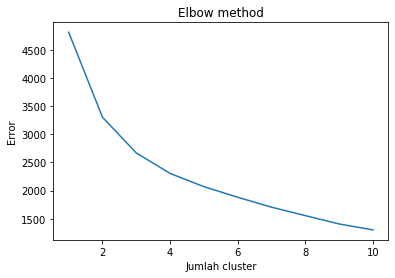

In [17]:
from sklearn.cluster import KMeans
X_Cluster = df2
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X_Cluster)
    kmeans.fit(X_Cluster)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('Jumlah cluster')
plt.ylabel('Error')
plt.show()

In [18]:
kmeans2 = KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(X_Cluster)
print(y_kmeans2)

[1 1 1 ... 1 1 1]


In [19]:
kmeans2.cluster_centers_

array([[0.34813528, 0.55293568, 4.67162059, 1.34486133, 0.41441778,
        1.44503986, 0.31424563, 1.19852489, 2.39458327, 1.12913353,
        0.7119688 , 0.41387002, 2.27124649, 0.6886    , 0.45869166,
        0.46563423, 0.11672655, 0.16593878, 1.35374043, 0.22784043,
        0.15988997, 0.13623746, 0.13098138, 0.18524409, 0.21315312,
        1.15041552, 0.48459959, 0.51540041, 0.1211499 , 0.8788501 ],
       [0.48960049, 0.66979842, 2.60539394, 1.4975194 , 0.65388696,
        1.59128217, 0.43130254, 1.15276582, 2.54011605, 1.20830156,
        0.67774897, 0.39736642, 2.04414323, 0.4227609 , 0.3796844 ,
        0.33603618, 0.12430767, 0.15479672, 1.1452621 , 0.22572061,
        0.15629168, 0.13354983, 0.13111189, 0.15676912, 0.19910484,
        1.49165951, 0.56323777, 0.43676223, 0.78583474, 0.21416526]])

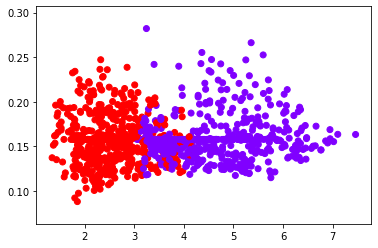

In [20]:
plt.scatter(df2.iloc[:, 2], df2.iloc[:, 20], c=y_kmeans2, cmap='rainbow')

<h2>4. Klasifikasi</h2>

In [21]:
x = df2
y = df_utuh.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33,random_state=0)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.93


In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.92


D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.97
Accuracy of SVM classifier on test set: 0.94
